# EFIx_LP_1B (Langmuir probe 2Hz)

> Abstract: Access to the electric field instrument langmuir probe data (2Hz) (level 1b product).

In [1]:
%load_ext watermark
%watermark -i -v -p viresclient,pandas,xarray,matplotlib

Python implementation: CPython
Python version       : 3.11.6
IPython version      : 8.18.0

viresclient: 0.11.6
pandas     : 2.1.3
xarray     : 2023.12.0
matplotlib : 3.8.2



In [2]:
from viresclient import SwarmRequest
import datetime as dt
import matplotlib.pyplot as plt

request = SwarmRequest()

## EFIx_LP_1B product information

Measurements from the Langmuir Probe (LP) of the Electric Field Instrument (EFI) at 2Hz, for each Swarm spacecraft.

Documentation:
- https://earth.esa.int/web/guest/missions/esa-eo-missions/swarm/data-handbook/level-1b-product-definitions#EFIX_LP_1B_Product

### Check what "EFI" data variables are available

In [3]:
request.available_collections("EFI", details=False)

{'EFI': ['SW_OPER_EFIA_LP_1B',
  'SW_OPER_EFIB_LP_1B',
  'SW_OPER_EFIC_LP_1B',
  'SW_FAST_EFIA_LP_1B',
  'SW_FAST_EFIB_LP_1B',
  'SW_FAST_EFIC_LP_1B']}

In [4]:
request.available_measurements("EFI")

['U_orbit',
 'Ne',
 'Ne_error',
 'Te',
 'Te_error',
 'Vs',
 'Vs_error',
 'Flags_LP',
 'Flags_Ne',
 'Flags_Te',
 'Flags_Vs']

## Fetch one day of EFI data

In [5]:
request.set_collection("SW_OPER_EFIA_LP_1B")
request.set_products(
    measurements=['U_orbit',
                 'Ne',
                 'Ne_error',
                 'Te',
                 'Te_error',
                 'Vs',
                 'Vs_error',
                 'Flags_LP',
                 'Flags_Ne',
                 'Flags_Te',
                 'Flags_Vs']
)
data = request.get_between(
    dt.datetime(2016,1,1),
    dt.datetime(2016,1,2)
)

Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ] [1/1] 

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (16.076MB)

In [6]:
data.sources

['SW_OPER_EFIA_LP_1B_20160101T000000_20160101T235959_0602_MDR_EFI_LP']

### Load and plot using pandas/matplotlib

In [7]:
df = data.as_dataframe()
df.head()

Vs           Te      Radius  Flags_Te  \
Timestamp                                                                 
2016-01-01 00:00:00.196999936 -2.201  2945.204213  6833853.41        10   
2016-01-01 00:00:00.696000000 -2.193  2891.969742  6833854.00        10   
2016-01-01 00:00:01.196999936 -2.200  2921.955198  6833854.59        10   
2016-01-01 00:00:01.696000000 -2.194  2936.736557  6833855.18        10   
2016-01-01 00:00:02.196999936 -2.190  2870.090847  6833855.77        10   

                               Flags_LP   U_orbit  Flags_Vs   Latitude  \
Timestamp                                                                
2016-01-01 00:00:00.196999936         1  7604.407        20 -72.511716   
2016-01-01 00:00:00.696000000         1  7604.397        20 -72.543238   
2016-01-01 00:00:01.196999936         1  7604.388        20 -72.574886   
2016-01-01 00:00:01.696000000         1  7604.379        20 -72.606406   
2016-01-01 00:00:02.196999936         1  7604.370        20 -72.638051   

                                   Ne_error Spacecraft    Te_error  \
Timestamp                                                            
2016-01-01 00:00:00.196999936  28365.234486          A -245.895850   
2016-01-01 00:00:00.696000000  28725.923124          A -259.711123   
2016-01-01 00:00:01.196999936  29787.432673          A -247.826218   
2016-01-01 00:00:01.696000000  31005.243307          A -239.714158   
2016-01-01 00:00:02.196999936  31225.718904          A -257.759606   

                                   Vs_error  Flags_Ne        Ne  Longitude  
Timestamp                                                                   
2016-01-01 00:00:00.196999936  9.999990e+09        10  126188.4  92.799630  
2016-01-01 00:00:00.696000000  9.999990e+09        10  127792.9  92.813943  
2016-01-01 00:00:01.196999936  9.999990e+09        10  132515.3  92.828370  
2016-01-01 00:00:01.696000000  9.999990e+09        10  137933.0  92.842799  
2016-01-01 00:00:02.196999936  9.999990e+09        10  138913.8  92.857342

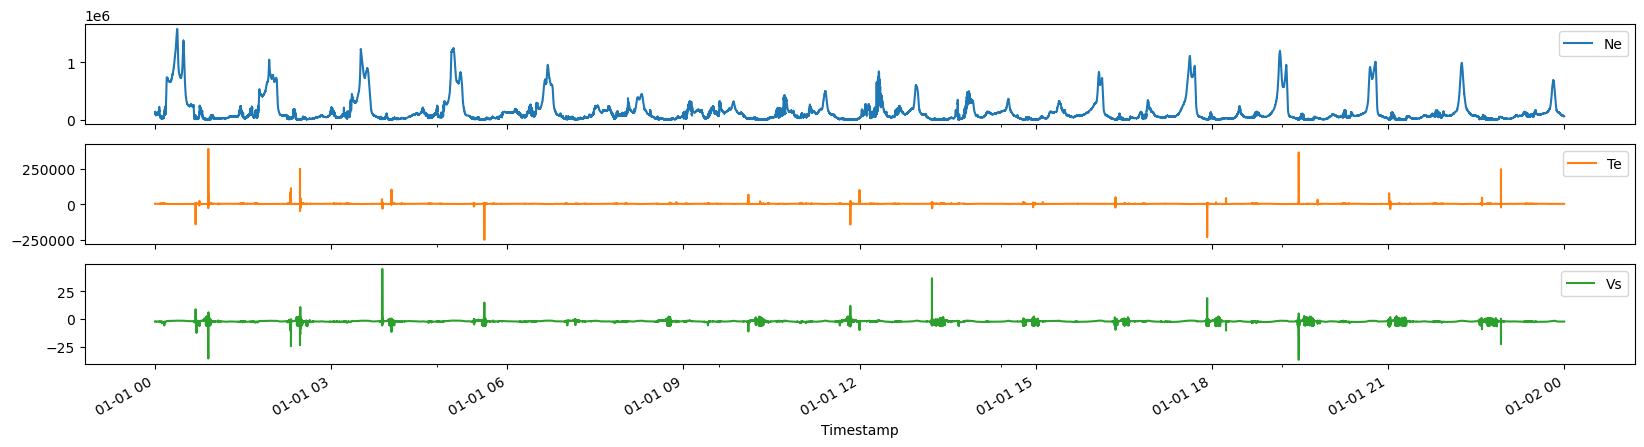

In [8]:
df.plot(y=["Ne", "Te", "Vs"], subplots=True, figsize=(20,5));

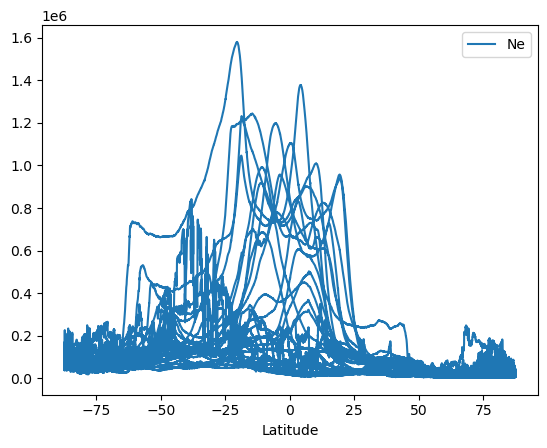

In [9]:
df.plot(x="Latitude", y="Ne");

### Load as xarray

In [10]:
ds = data.as_xarray()
ds

<xarray.Dataset>
Dimensions:     (Timestamp: 172776)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2016-01-01T00:00:00.196999936 ... ...
Data variables: (12/15)
    Spacecraft  (Timestamp) object 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    Te          (Timestamp) float64 2.945e+03 2.892e+03 ... 2.527e+03 2.545e+03
    Radius      (Timestamp) float64 6.834e+06 6.834e+06 ... 6.823e+06 6.823e+06
    Flags_LP    (Timestamp) uint8 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    U_orbit     (Timestamp) float64 7.604e+03 7.604e+03 ... 7.634e+03 7.634e+03
    Ne_error    (Timestamp) float64 2.837e+04 2.873e+04 ... 1.458e+04 1.445e+04
    ...          ...
    Vs          (Timestamp) float64 -2.201 -2.193 -2.2 ... -2.244 -2.239 -2.243
    Flags_Te    (Timestamp) uint8 10 10 10 10 10 10 10 ... 10 10 10 10 10 10 10
    Flags_Vs    (Timestamp) uint8 20 20 20 20 20 20 20 ... 20 20 20 20 20 20 20
    Latitude    (Timestamp) float64 -72.51 -72.54 -72.57 ... 31.65 31.69 31.72
    Vs_error    (Timestamp) float64 1e+10 1e+10 1e+10 ... 1e+10 1e+10 1e+10
    Longitude   (Timestamp) float64 92.8 92.81 92.83 ... -95.37 -95.37 -95.37
Attributes:
    Sources:         ['SW_OPER_EFIA_LP_1B_20160101T000000_20160101T235959_060...
    MagneticModels:  []
    AppliedFilters:  []

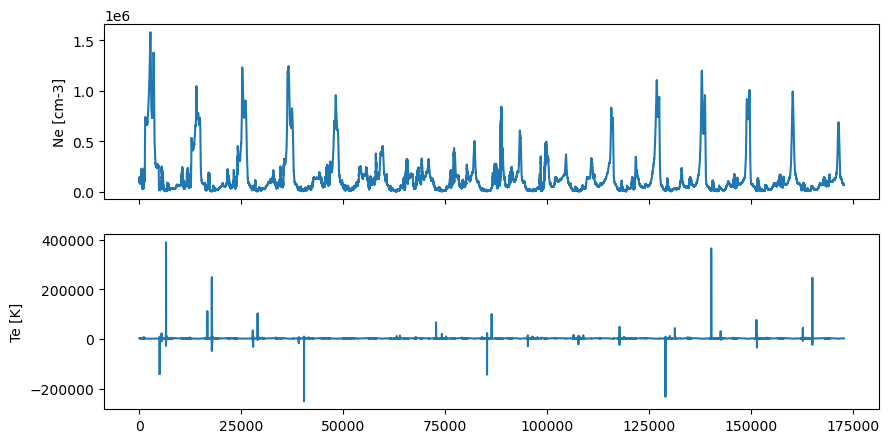

In [11]:
fig, (ax1, ax2) = plt.subplots(figsize=(10, 5), nrows=2, sharex=True)
def subplot(_ax, da):
    """Plot a given DataArray on a given axes"""
    _ax.plot(da)
    _ax.set_ylabel(f"{da.name} [{da.units}]")
for var, ax in zip(("Ne", "Te"), (ax1, ax2)):
    subplot(ax, ds[var])